In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.preprocessing import RobustScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import scipy

In [2]:
df = pd.read_csv('Data/video_game_sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df = df.drop(['Name', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Developer', 'Publisher'], axis=1) 
# Vì output là Global_Sales nên các biến sale ở các nơi khác nhau sẽ tổng lại thành Global_Sales
# Name, Year_of_Release, Developer và Publisher sẽ không ảnh hưởng đến Global_Sales

In [6]:
df.head()

,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,Sports,82.53,76.0,51.0,8,322.0,E
1,NES,Platform,40.24,NaN,NaN,NaN,NaN,NaN
2,Wii,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii,Sports,32.77,80.0,73.0,8,192.0,E
4,GB,Role-Playing,31.37,NaN,NaN,NaN,NaN,NaN


In [7]:
df['User_Score'].replace({'tbd':np.nan}, inplace=True)

In [8]:
df['User_Score']= df['User_Score'].astype(float)

In [9]:
df.isnull().sum()

Platform           0
Genre              2
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      9129
User_Count      9129
Rating          6769
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df_catogory = df.select_dtypes("O")
df_catogory.head(2)

,Platform,Genre,Rating
0,Wii,Sports,E
2,Wii,Racing,E


In [12]:
df_numeric = df.select_dtypes(exclude="O").drop('Global_Sales', axis=1)
df_numeric.head(2)

,Critic_Score,Critic_Count,User_Score,User_Count
0,76.0,51.0,8.0,322.0
2,82.0,73.0,8.3,709.0


In [13]:
df_out = df[['Global_Sales']]
df_out.head(2)

,Global_Sales
0,82.53
2,35.52


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6947 entries, 0 to 16706
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6947 non-null   object 
 1   Genre         6947 non-null   object 
 2   Global_Sales  6947 non-null   float64
 3   Critic_Score  6947 non-null   float64
 4   Critic_Count  6947 non-null   float64
 5   User_Score    6947 non-null   float64
 6   User_Count    6947 non-null   float64
 7   Rating        6947 non-null   object 
dtypes: float64(5), object(3)
memory usage: 488.5+ KB


# Phân tích đơn biến

Class count of Platform:

PS2     1161
X360     877
PS3      783
PC       667
XB       580
Wii      491
DS       468
PSP      393
GC       356
GBA      241
PS4      239
XOne     159
3DS      157
PS       153
PSV      119
WiiU      89
DC        14
Name: Platform, dtype: int64


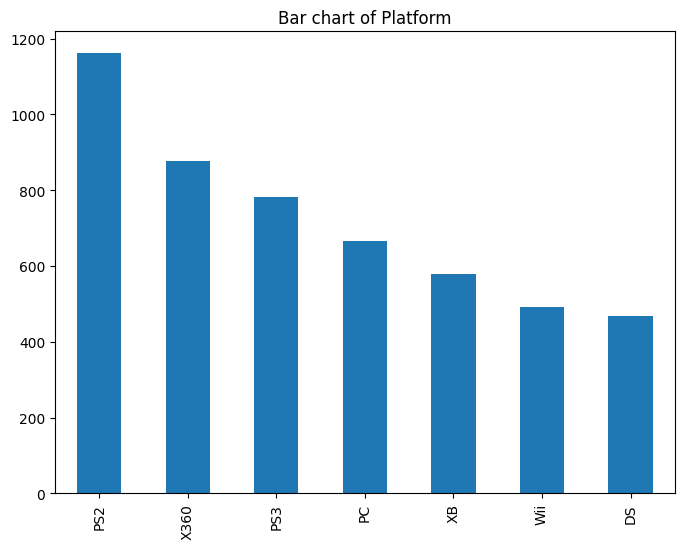

Class count of Genre:

Action          1663
Sports           965
Shooter          882
Role-Playing     718
Racing           591
Platform         407
Misc             394
Fighting         382
Simulation       301
Strategy         274
Adventure        249
Puzzle           121
Name: Genre, dtype: int64


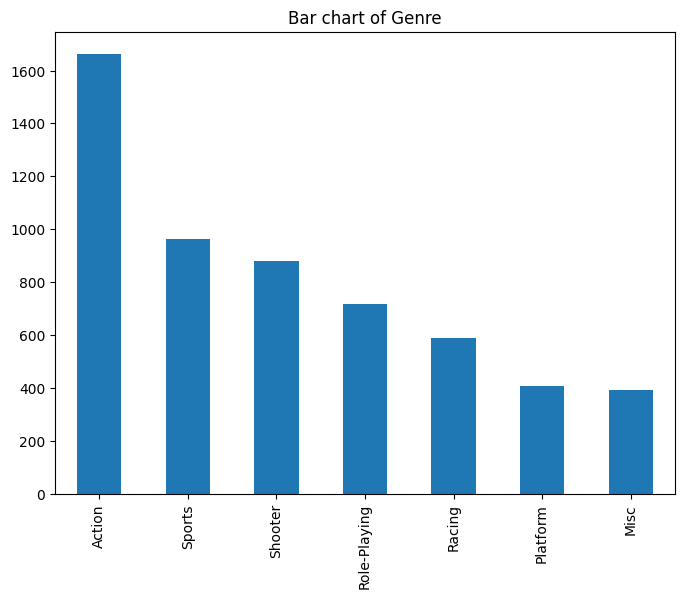

Class count of Rating:

T       2420
E       2118
M       1459
E10+     946
RP         2
AO         1
K-A        1
Name: Rating, dtype: int64


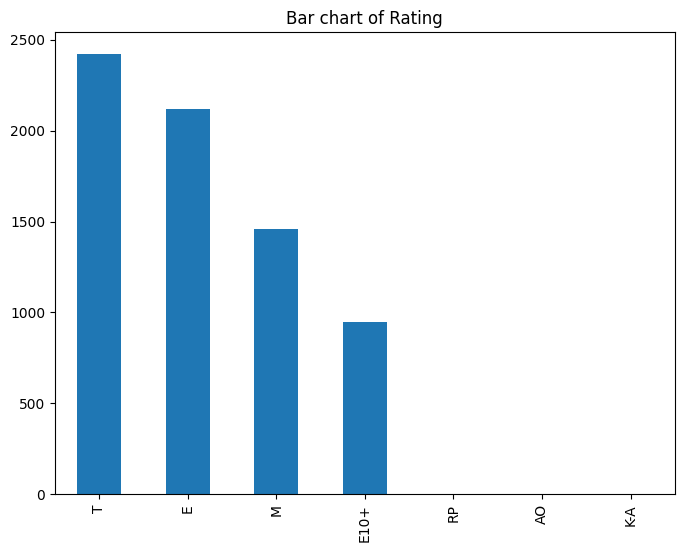

In [15]:
# Biến phân loại
for i in df_catogory.columns:
    _analyzer.analyze_category_variable(i, df_catogory)

=====
central tendency of Critic_Score: {'mean': 70.2635670073413, 'median': 72.0, 'mode': 80.0, 'min': 13.0, 'max': 98.0, 'range': 85.0}
=====
Dispersion of Critic_Score: 
 {'range': 85.0, 'q1': 62.0, 'q3': 80.0, 'iqr': 18.0, 'var': 192.9021607845606, 'skew': -0.7497781632295427, 'kurtosis': 0.40135625025472743}
=====


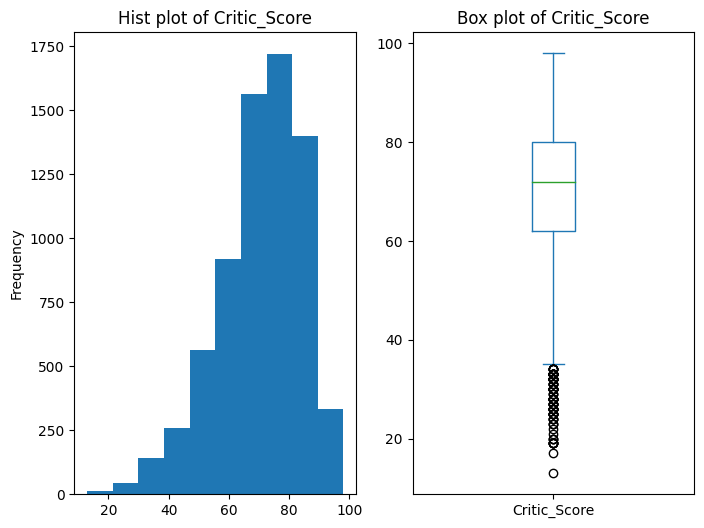

=====
central tendency of Critic_Count: {'mean': 28.87361450986037, 'median': 24.0, 'mode': 17.0, 'min': 3.0, 'max': 113.0, 'range': 110.0}
=====
Dispersion of Critic_Count: 
 {'range': 110.0, 'q1': 14.0, 'q3': 39.0, 'iqr': 25.0, 'var': 368.4761061819259, 'skew': 1.0341648392951042, 'kurtosis': 0.7409771029174372}
=====


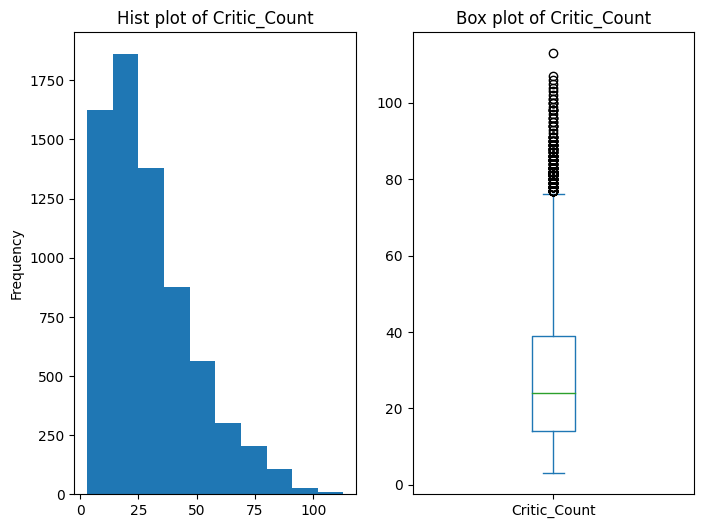

=====
central tendency of User_Score: {'mean': 7.183359723621708, 'median': 7.5, 'mode': 7.8, 'min': 0.5, 'max': 9.6, 'range': 9.1}
=====
Dispersion of User_Score: 
 {'range': 9.1, 'q1': 6.5, 'q3': 8.2, 'iqr': 1.6999999999999993, 'var': 2.0793631419594973, 'skew': -1.2210594349440786, 'kurtosis': 1.6147996785248804}
=====


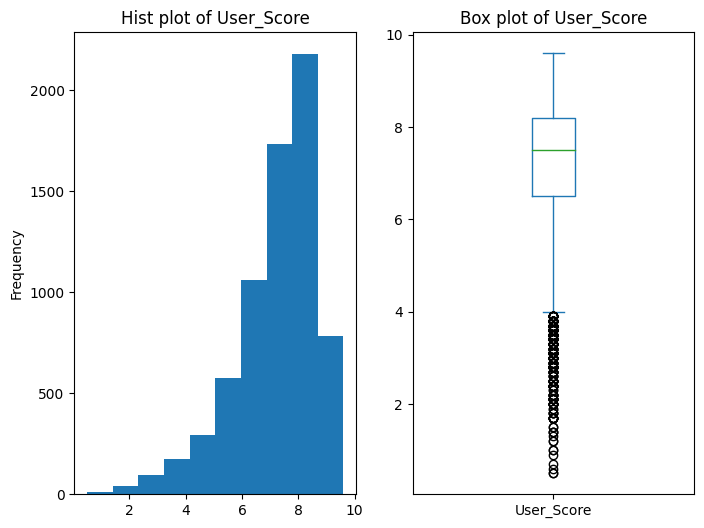

=====
central tendency of User_Count: {'mean': 173.82136173888009, 'median': 27.0, 'mode': 6.0, 'min': 4.0, 'max': 10665.0, 'range': 10661.0}
=====
Dispersion of User_Count: 
 {'range': 10661.0, 'q1': 11.0, 'q3': 88.0, 'iqr': 77.0, 'var': 341654.0908882692, 'skew': 8.678881102825322, 'kurtosis': 103.62676551065998}
=====


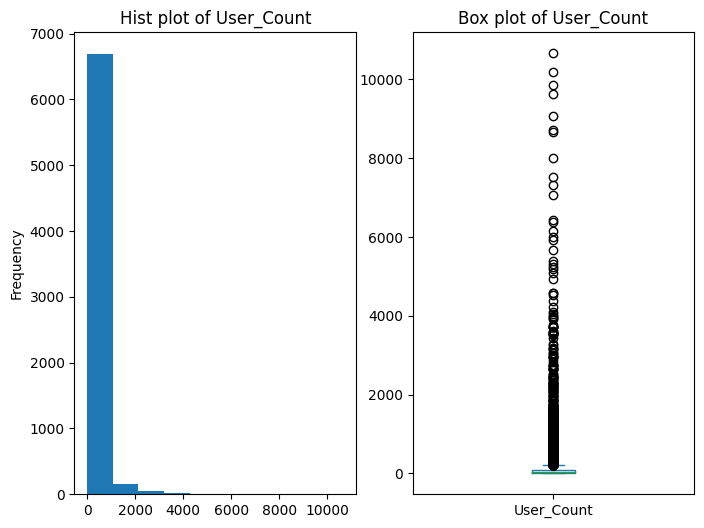

In [16]:
# Biến liên tục
for i in df_numeric.columns:
    _analyzer.analyze_numeric_variable(variable_name=i, df=df_numeric)

=====
central tendency of Global_Sales: {'mean': 0.7730977400316683, 'median': 0.29, 'mode': 0.02, 'min': 0.01, 'max': 82.53, 'range': 82.52}
=====
Dispersion of Global_Sales: 
 {'range': 82.52, 'q1': 0.11, 'q3': 0.75, 'iqr': 0.64, 'var': 3.7981449376093463, 'skew': 16.178391146373123, 'kurtosis': 508.8930108086051}
=====


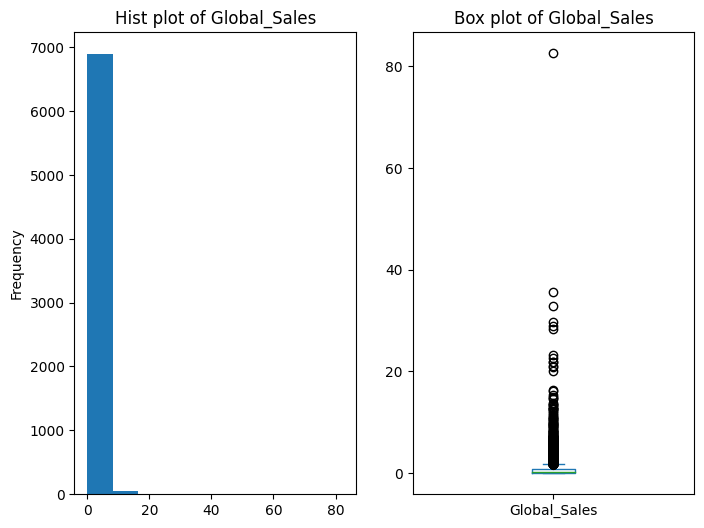

In [17]:
# Output
_analyzer.analyze_numeric_variable('Global_Sales', df)

Output không là phân phối chuẩn và có nhiều outlier

# Phân tích 2 biến In - In

## Numeric - Numeric

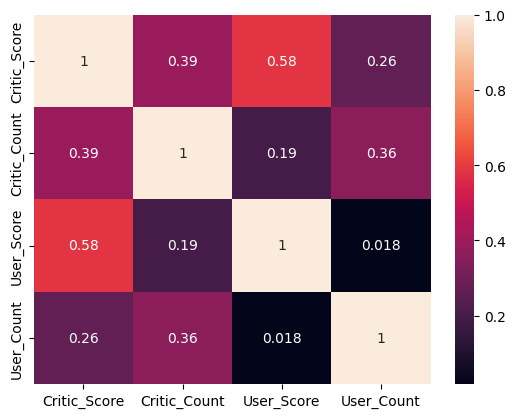

In [18]:
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

Nhận xét:
- Các biến numeric không có quan hệ mạnh mẽ với nhau

## Catogory - Catogory

In [19]:
def generate_unique_pair_of_variable(data_frame):
    unique_columns = []
    for col_1 in data_frame.columns[:-1]:
        for col_2 in data_frame.columns[1:]:
            if col_1 == col_2:
                continue
            pair_var = set([col_1, col_2])
            if pair_var not in unique_columns:
                unique_columns.append(pair_var)
    return unique_columns

In [20]:
unique_columns = generate_unique_pair_of_variable(df_catogory)
lst = [list(i) for i in unique_columns]

In [21]:
catogory_lst = pd.DataFrame(lst, columns=['var1','var2'])
catogory_lst

,var1,var2
0,Genre,Platform
1,Rating,Platform
2,Genre,Rating


In [22]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [23]:
def check_catogory_catogory(var_1, var_2, data_frame, prob = 0.95 ):
    tw_table = pd.crosstab(data_frame[var_1], data_frame[var_2])
    stats, p_value, dof, expected = chi2_contingency(tw_table)
    prob = 0.95
    alpha = 1 - prob
    if p_value <= alpha:
        return("Reject H0 - Dependent")
    else:
        return("Accept H0 - Independent")

In [24]:
result = []
for i in lst:
    results = check_catogory_catogory(i[0], i[1], df_catogory)
    result.append(results)

In [25]:
catogory_lst['result']=result
catogory_lst

,var1,var2,result
0,Genre,Platform,Reject H0 - Dependent
1,Rating,Platform,Reject H0 - Dependent
2,Genre,Rating,Reject H0 - Dependent


Nhận xét:
- Các biến phụ thuộc với nhau

# Phân tích 2 biến In - Out ( Out là numeric )

In [26]:
# In numeric - Out

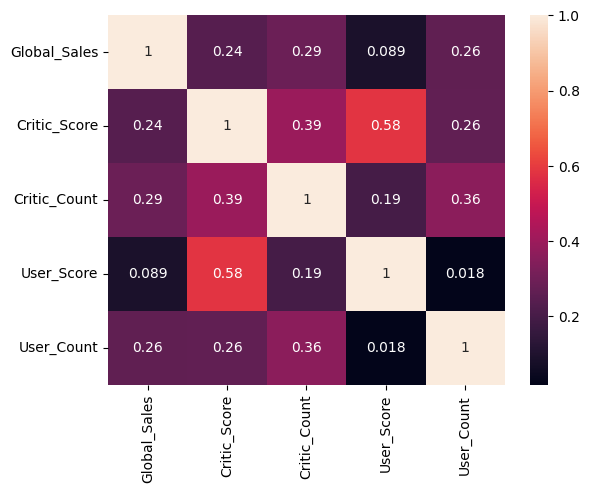

In [27]:
sns.heatmap( df.drop(columns=df_catogory.columns).corr(), annot=True)
plt.show()

In [28]:
# In Catogory - Out

                   sum_sq      df          F        PR(>F)
C(Platform)    695.675117    16.0  11.730572  7.013351e-31
Residual     25686.239619  6930.0        NaN           NaN


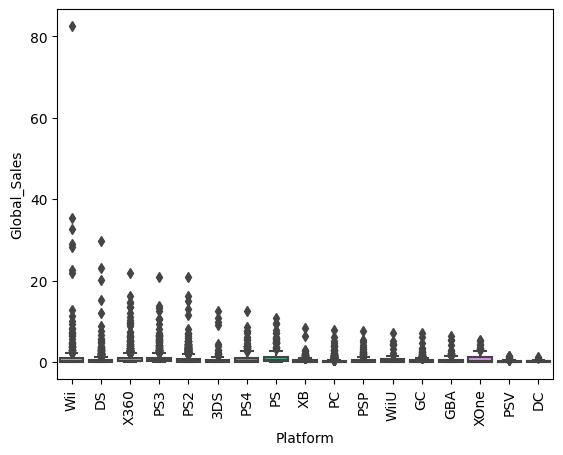

                sum_sq      df         F        PR(>F)
C(Genre)    219.747671    11.0  5.295468  2.135191e-08
Residual  26162.167065  6935.0       NaN           NaN


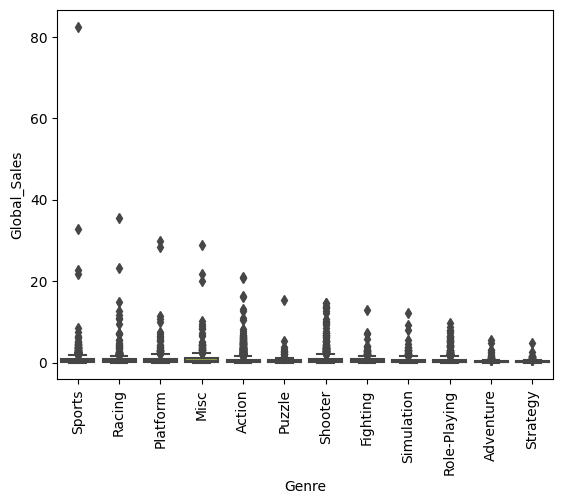

                 sum_sq      df        F        PR(>F)
C(Rating)    250.990176     6.0  11.1099  2.274637e-12
Residual   26130.924561  6940.0      NaN           NaN


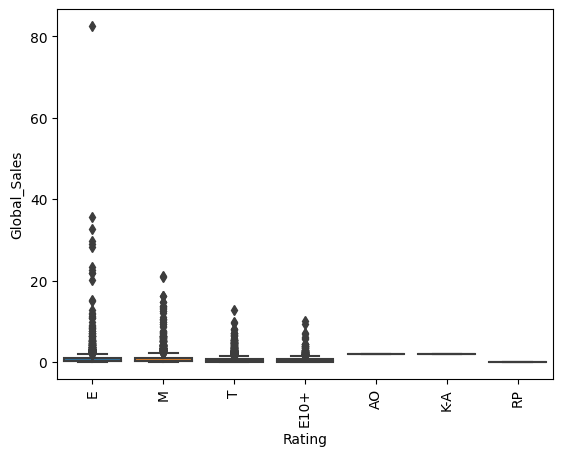

In [29]:
for i in df_catogory.columns:
    _analyzer.analyze_continous_vs_categories('Global_Sales',i, df)

# Loại outlier

In [30]:
def check_oulier(col_name, data):
    _q1 = data[col_name].quantile(0.25)
    _q3 = data[col_name].quantile(0.75)
    _iqr = _q3 - _q1
    upper = _q3 + (1.5*_iqr)
    lower = _q1 - (1.5*_iqr)
    data1 = data[(data[col_name] >= lower) & (data[col_name] <= upper)].reset_index(drop=True)
    return data1

In [31]:
df.shape

(6947, 8)

In [32]:
#for i in df_numeric.columns:
#    df = check_oulier(i, df)

In [33]:
df.shape

(6947, 8)

# Chia train, test

In [34]:
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [35]:
X_train.shape, X_test.shape

((4862, 7), (2085, 7))

# Scale

In [36]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from feature_engine.encoding import OneHotEncoder

In [37]:
sc = OneHotEncoder(drop_last=True, variables= list(df_catogory.columns))

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train.shape, X_test.shape

((4862, 36), (2085, 36))

In [40]:
display(X_train.head(2), X_test.head(2))

,Critic_Score,Critic_Count,User_Score,User_Count,Platform_PS3,Platform_PS2,Platform_3DS,Platform_X360,Platform_XB,Platform_Wii,...,Genre_Puzzle,Genre_Simulation,Genre_Platform,Genre_Racing,Genre_Adventure,Rating_E,Rating_T,Rating_M,Rating_E10+,Rating_RP
9204,82.0,18.0,5.2,6.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4997,60.0,7.0,5.1,7.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,Critic_Score,Critic_Count,User_Score,User_Count,Platform_PS3,Platform_PS2,Platform_3DS,Platform_X360,Platform_XB,Platform_Wii,...,Genre_Puzzle,Genre_Simulation,Genre_Platform,Genre_Racing,Genre_Adventure,Rating_E,Rating_T,Rating_M,Rating_E10+,Rating_RP
7962,79.0,47.0,8.5,15.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2571,68.0,16.0,8.3,15.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [41]:
wp = SklearnTransformerWrapper(transformer= RobustScaler(), variables= list(df_numeric.columns) )

In [42]:
X_train = wp.fit_transform(X_train)
X_test = wp.transform(X_test)

In [43]:
X_train.shape, X_test.shape

((4862, 36), (2085, 36))

In [44]:
display(X_train.head(2), X_test.head(2))

,Critic_Score,Critic_Count,User_Score,User_Count,Platform_PS3,Platform_PS2,Platform_3DS,Platform_X360,Platform_XB,Platform_Wii,...,Genre_Puzzle,Genre_Simulation,Genre_Platform,Genre_Racing,Genre_Adventure,Rating_E,Rating_T,Rating_M,Rating_E10+,Rating_RP
9204,0.555556,-0.24,-1.352941,-0.276316,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4997,-0.666667,-0.68,-1.411765,-0.263158,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,Critic_Score,Critic_Count,User_Score,User_Count,Platform_PS3,Platform_PS2,Platform_3DS,Platform_X360,Platform_XB,Platform_Wii,...,Genre_Puzzle,Genre_Simulation,Genre_Platform,Genre_Racing,Genre_Adventure,Rating_E,Rating_T,Rating_M,Rating_E10+,Rating_RP
7962,0.388889,0.92,0.588235,-0.157895,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2571,-0.222222,-0.32,0.470588,-0.157895,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# Lựa chọn model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime
from datetime import timedelta
# Import KFold
from sklearn.model_selection import KFold

In [46]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50),
    RandomForestRegressor(n_estimators=100),
    SVR(kernel='rbf'),
    SVR(kernel='linear'),
    KNeighborsRegressor(n_neighbors=6),
    KNeighborsRegressor(n_neighbors=12),
]

In [47]:
def get_model_name(model):
    model_name = model.__class__.__name__
    if model_name == 'RandomForestRegressor':
        model_name += '_' + str(model.n_estimators)
    elif model_name == 'KNeighborsRegressor':
        model_name += '_' + str(model.n_neighbors)
    elif model_name == 'SVR':
        model_name += '_' + model.kernel
    return model_name

In [48]:
# Number of cross validation
kf = KFold(n_splits=10)
# Dataframe to store the model selection results
cv_df = pd.DataFrame(columns=['model', 'mean_score', 'std_score', 'accuracy_train', 'accuracy_test', 'time'])

# Loop through the models
for model in models:
    # Get the model name
    model_name = get_model_name(model)
    # Get the start time
    start_time = datetime.now()
    # Get the cross validation score for the model
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=-1)
    # Get the end time
    end_time = datetime.now()
    # Get the time taken to train the model
    time_taken = end_time - start_time
    # Get the accuracy score for the model
    model.fit(X_train, y_train)
    accuracy_train = round(model.score(X_train, y_train) * 100, 3)
    accuracy_test = round(model.score(X_test, y_test) * 100, 3)
    # Append the model name and score to the dataframe
    cv_df = pd.concat([cv_df, pd.DataFrame.from_records([  #cv_df = cv_df.append(
        {
            'model': model_name,
            'mean_score': cv_score.mean(),
            'std_score': cv_score.std(),
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'time': str(time_taken),
        }])],
                      ignore_index=True,

                      )

In [49]:
metrics = cv_df.sort_values(by = 'mean_score', ascending=False)
metrics

,model,mean_score,std_score,accuracy_train,accuracy_test,time
2,RandomForestRegressor_50,0.320347,0.243165,89.665,20.350,0:00:02.312530
3,RandomForestRegressor_100,0.320226,0.221804,91.323,21.174,0:00:07.561211
7,KNeighborsRegressor_12,0.236958,0.094773,34.769,26.822,0:00:00.513317
0,LinearRegression,0.209297,0.076741,17.269,25.188,0:00:03.153619
4,SVR_rbf,0.199929,0.084739,15.197,23.108,0:00:03.501104
6,KNeighborsRegressor_6,0.182371,0.137478,44.047,25.304,0:00:00.643617
5,SVR_linear,0.129892,0.066011,8.822,17.518,0:00:12.410569
1,DecisionTreeRegressor,-0.384595,0.492407,99.977,-151.533,0:00:02.348924


In [50]:
# Model ở tệp test chưa đc tốt do thiếu dữ liệu vì k xử lý tốt giá trị null
# Có thể lựa chọn model RandomForestRegressor

# Hyberparamiter turning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'n_estimators': [30, 50, 100, 200, 300],
    'max_depth': [3, 5, 8, 10, 15],
    'criterion': ['squared_error','absolute_error', 'friedman_mse', 'poisson'],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

In [53]:
clf_grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid= param_grid, cv= kf, n_jobs=-1)

In [54]:
clf_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'